In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_excel("Temporary_data3_Left_Right_Copy.xlsx")
datacorr = data.corr()
pd.set_option("display.max_columns", 1500)
pd.set_option("display.max_row", 1800)
pd.set_option("display.width", 1000)
df=pd.DataFrame(data)

>**TASK-7A: Please apply one-hot encoding method on one of the categorical variables (not SEX/gender) for the given AD dataset. Please explain what kind of transformation occured on the dataset.**

In [6]:
# apply one-hot encoding method on one of the categorical variables
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
encoder = OneHotEncoder(handle_unknown="ignore")
encoder_df = pd.DataFrame(encoder.fit_transform(df[["NACCAPOE"]]).toarray())
data_encoded=df.join(encoder_df)

>**TASK-7B: Please provide a couple of pivot tables in order to illustrate how SEX variable is influential on our target array (CDRGLOB). Please provide a few multidimensional analyses (not limited to two variables).**

In [7]:
rsumfrm=pd.qcut(data['RSUPFRM'],4)
csfvol=pd.qcut(data['CSFVOL'],6)
data_encoded.pivot_table('RHIPPO',index=['CDRGLOB','SEX'],columns=csfvol)

CSFVOL       (203.863, 281.494]  (281.494, 310.631]  (310.631, 341.468]  (341.468, 374.627]  (374.627, 413.118]  (413.118, 611.79]
CDRGLOB SEX                                                                                                                       
0       1              3.112767            3.290715            3.413018            3.373607            3.411097           3.349690
        2              3.114644            3.209066            3.135438            3.195362            3.132632           3.129084
1       1              2.966510            3.118732            3.065056            2.916851            3.136600           3.105589
        2              2.806638            2.821352            2.762043            2.841369            2.795255           2.753838
2       1                   NaN            2.785800            2.952091            2.535860            2.755104           2.924018
        2              2.603343            2.291075            2.592880            2.571182            2.477140           2.582483
3       1                   NaN            2.730150            2.788100            2.461900            2.287171           2.678094
        2                   NaN            2.091900            2.242300            2.445200            2.442540           2.866567

In [8]:
rsumfrm=pd.qcut(data['RSUPFRM'],4)
csfvol=pd.qcut(data['CSFVOL'],6)
data_encoded.pivot_table('CDRGLOB',index=['SEX',rsumfrm],columns=csfvol)

CSFVOL              (203.863, 281.494]  (281.494, 310.631]  (310.631, 341.468]  (341.468, 374.627]  (374.627, 413.118]  (413.118, 611.79]
SEX RSUPFRM                                                                                                                              
1   (0.901, 1.988]            0.600000            1.052632            1.074074            0.640000            1.371429           1.393443
    (1.988, 2.198]            0.714286            0.409091            0.571429            0.733333            1.093023           1.391304
    (2.198, 2.376]            0.000000            0.500000            0.461538            0.517241            0.818182           1.204545
    (2.376, 4.06]             0.666667            0.300000            0.476190            0.421053            0.551724           0.441176
2   (0.901, 1.988]            0.605263            0.974359            0.857143            1.117647            1.352941           1.250000
    (1.988, 2.198]            0.463415            0.372549            0.702703            1.117647            0.875000           1.666667
    (2.198, 2.376]            0.239437            0.394737            0.380952            0.807692            1.000000           1.285714
    (2.376, 4.06]             0.175439            0.257143            0.413793            0.363636            0.617647           0.416667

In [9]:
rsumfrm=pd.qcut(data['RSUPFRM'],4)
csfvol=pd.qcut(data['CSFVOL'],6)
data_encoded.pivot_table('CDRGLOB',index=['SEX'],columns=csfvol)

CSFVOL,"(203.863, 281.494]","(281.494, 310.631]","(310.631, 341.468]","(341.468, 374.627]","(374.627, 413.118]","(413.118, 611.79]"
SEX,,,,,,
1,0.526316,0.603175,0.695122,0.568182,0.985714,1.172973
2,0.333333,0.496933,0.587413,0.818841,0.894118,0.829268


>**TASK-7C: Referring to the problem in part B, please provide a potential solution to the gender-based issue that appears as a bottleneck for the model development phase. One possible solution might be to provide normalization of the numeric columns with respect to the total brain volume (NACCBRNV column).**

In [28]:
data_encoded_1=data_encoded.loc[:,'NACCICV':'RTRTEMM']
data_encoded_2=data_encoded['NACCBRNV']
data_encoded.loc[:,'NACCICV':'RTRTEMM']=data_encoded.loc[:,'NACCICV':'RTRTEMM'].div(data_encoded['NACCBRNV'], axis=0)

>**TASK-7D: After the normalization process, please provide a correlation matrix to report the critical features that have high correlation (positive or negative) with the target array (CDRGLOB).**

In [13]:
data_encoded_corr=data_encoded.corr()
data_encoded_corr

,SEX,EDUC,MARISTAT,INDEPEND,RESIDENC,NACCFAM,ANYMEDS,SMOKYRS,NACCTBI,DIABETES,ALCOHOL,HXHYPER,HYPERCHO,HXSTROKE,FOCLSIGN,HACHIN,CDRGLOB,DEL,HALL,AGIT,DEPD,ANX,ELAT,APA,DISN,IRR,MOT,NITE,APP,NACCGDS,DROPACT,NACCMMSE,NACCAGEB,NACCAMD,NACCBMI,NACCAPOE,NACCNE4S,NACCICV,NACCBRNV,NACCWMVL,CSFVOL,GRAYVOL,WHITEVOL,WMHVOL,CEREALL,CERETISS,CERECSF,CEREGR,CEREWH,LHIPPO,RHIPPO,LLATVENT,RLATVENT,THIRVENT,LFRCORT,RFRCORT,LOCCORT,ROCCORT,LPARCORT,RPARCORT,LTEMPCOR,RTEMPCOR,LCAC,LCACM,LCMF,LCMFM,LCUN,LCUNM,LENT,LENTM,LFUS,LFUSM,LINFPAR,LINFPARM,LINFTEMP,LINFTEMM,LINSULA,LINSULAM,LISTHC,LISTHCM,LLATOCC,LLATOCCM,LLATORBF,LLATORBM,LLING,LLINGM,LMEDORBF,LMEDORBM,LMIDTEMP,LMIDTEMM,LPARCEN,LPARCENM,LPARHIP,LPARHIPM,LPARSOP,LPARSOPM,LPARORB,LPARORBM,LPARTRI,LPARTRIM,LPERCAL,LPERCALM,LPOSCEN,LPOSCENM,LPOSCIN,LPOSCINM,LPRECEN,LPRECENM,LPRECUN,LPRECUNM,LROSANC,LROSANCM,LROSMF,LROSMFM,LSUPFR,LSUPFRM,LSUPPAR,LSUPPARM,LSUPTEM,LSUPTEMM,LSUPMAR,LSUPMARM,LTRTEM,LTRTEMM,RCAC,RCACM,RCMF,RCMFM,RCUN,RCUNM,RENT,RENTM,RFUS,RFUSM,RINFPAR,RINFPARM,RINFTEMP,RINFTEMM,RINSULA,RINSULAM,RISTHC,RISTHCM,RLATOCC,RLATOCCM,RLATORBF,RLATORBM,RLING,RLINGM,RMEDORBF,RMEDORBM,RMIDTEMP,RMIDTEMM,RPARCEN,RPARCENM,RPARHIP,RPARHIPM,RPARSOP,RPARSOPM,RPARORB,RPARORBM,RPARTRI,RPARTRIM,RPERCAL,RPERCALM,RPOSCEN,RPOSCENM,RPOSCIN,RPOSCINM,RPRECEN,RPRECENM,RPRECUN,RPRECUNM,RROSANC,RROSANCM,RROSMF,RROSMFM,RSUPFR,RSUPFRM,RSUPPAR,RSUPPARM,RSUPTEM,RSUPTEMM,RSUPMAR,RSUPMARM,RTRTEM,RTRTEMM,0,1,2,3,4,5
SEX,1.000000,-0.129742,0.244620,-0.098873,0.054726,-0.005097,-0.008961,-0.115607,-0.056971,-0.023426,-0.124100,-0.067217,-0.059083,-0.034871,-0.026872,-0.048389,-0.180540,-0.012716,-0.011208,-0.049036,-0.015746,-0.034077,-0.053545,-0.143125,-0.083826,-0.114375,-0.031658,-0.065751,-0.094998,0.007005,0.014539,0.146987,-0.094686,-0.016924,-0.086121,-0.034608,-0.060329,-0.177125,NaN,-0.049081,-0.192948,0.056595,-0.056595,0.013908,-0.190577,-0.006337,-0.209151,0.059310,-0.074086,0.186692,0.188988,-0.198594,-0.204711,-0.228969,0.034548,0.039376,-0.049596,-0.033764,0.118264,0.138517,0.035875,0.027704,-0.029999,0.314733,0.016539,0.278177,-0.174594,0.134597,-0.049254,0.269247,0.023195,0.325285,0.071977,0.339309,-0.018377,0.318634,0.027591,0.264946,-0.104416,0.258774,0.049735,0.299325,-0.016449,0.298159,-0.057215,0.271665,0.041035,0.262511,0.029035,0.361187,0.013079,0.200319,0.132485,0.247268,0.019215,0.236694,0.053200,0.292300,0.007970,0.261745,-0.010445,0.232897,0.117778,0.312534,0.011719,0.297614,0.070977,0.254404,-0.011421,0.275834,-0.063424,0.270119,0.058719,0.323418,0.008738,0.352045,0.101006,0.293207,0.025658,0.328483,0.092675,0.346320,-0.005098,0.242003,-0.022725,0.281663,-0.087853,0.285052,-0.102340,0.216156,-0.015376,0.276165,0.020812,0.328090,0.106513,0.353266,0.007424,0.307730,0.039507,0.308900,-0.089614,0.263177,0.024200,0.293472,0.037482,0.267609,-0.116723,0.279751,0.072160,0.261906,0.037234,0.324360,0.080544,0.228313,0.176040,0.305478,0.095172,0.281112,-0.043179,0.273960,0.041267,0.278845,0.047216,0.274271,0.114075,0.315852,0.032134,0.305405,0.057800,0.270874,0.006136,0.291332,-0.010310,0.246960,0.049092,0.318739,0.001571,0.374542,0.084131,0.312942,0.042818,0.309472,0.064140,0.329157,0.027213,0.172061,0.016330,-0.007900,0.050068,-0.054363,-0.043060,0.033144
EDUC,-0.129742,1.000000,-0.021607,-0.108642,-0.030139,0.062121,0.052266,-0.102343,-0.017841,-0.157286,-0.108352,-0.164950,-0.071618,-0.054331,-0.007798,-0.083706,-0.140977,-0.103052,-0.106707,-0.091291,-0.080317,-0.021253,-0.045382,-0.041707,-0.071561,-0.056311,-0.079143,-0.094045,-0.087353,-0.129117,-0.129397,0.223803,-0.075425,-0.011575,-0.145644,0.019715,0.030858,0.016360,NaN,-0.108082,0.029970,0.077461,-0.077461,-0.064914,0.010761,-0.050048,0.026985,0.113270,-0.120276,-0.068754,-0.039142,-0.007785,-0.036873,-0.041732,0.149011,0.121580,0.031292,0.090616,0.016299,0.041326,-0.010708,-0.007996,0.021238,0.001374,0.130279,0.062869,0.026149,-0.019021,-0.052347,-0.055725,-0.036101,-0.159907,-0.059744,-0.181225,-0.019987,-0.159858,0.006960,-0.041670

In [14]:
data_encoded_corr_cdrglobclm=data_encoded_corr.loc['CDRGLOB'].abs()>0.4
data_encoded_corr_cdrglobclm[data_encoded_corr_cdrglobclm==True]

INDEPEND    True
CDRGLOB     True
APA         True
NACCMMSE    True
NACCICV     True
CSFVOL      True
CERECSF     True
LLATVENT    True
RLATVENT    True
Name: CDRGLOB, dtype: bool

In [15]:
data_crr_b4=data_encoded_corr[data_encoded_corr.loc['CDRGLOB'].abs()>0.4]['CDRGLOB']
data_crr_b4

INDEPEND    0.693881
CDRGLOB     1.000000
APA         0.448558
NACCMMSE   -0.746660
NACCICV     0.429561
CSFVOL      0.408708
CERECSF     0.420518
LLATVENT    0.443272
RLATVENT    0.435256
Name: CDRGLOB, dtype: float64

>**TASK-7E: Please develop 3 distinct formulas (in other words derived features like BMI score) that involve the critical features in Part-7D and then ensure that these derived features could be used as predictive variables for CDRGLOB (again correlation analysis will give you insight).**

In [16]:
def f1(x,z):
  return x*z

def f2(x,y,z,k):
  return (k*y)+(z+x)

def f3(x,y):
  return (2*x)*(1/y)

In [17]:
f1_data=f1(data_encoded['APA'],data_encoded['CSFVOL'])

In [18]:
f2_data=f2(data_encoded['RLATVENT'],data_encoded['CERECSF'],data_encoded['LLATVENT'],data_encoded['INDEPEND'])

In [19]:
f3_data=f3(data_encoded['NACCICV'],data_encoded['NACCMMSE'])

In [20]:

for i in [f1_data,f2_data,f3_data]:
    (i - i.min()) / (i.max() - i.min())
    print(i)

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
5       0.000000
6       0.000000
7       0.000000
8       0.000000
9       0.000000
10      0.000000
11      0.000000
12      0.000000
13      0.000000
14      0.000000
15      0.000000
16      0.000000
17      0.000000
18      0.000000
19      0.000000
20      0.000000
21      0.000000
22      0.381576
23      0.000000
24      0.000000
25      0.000000
26      0.000000
27      0.000000
28      0.000000
29      0.000000
30      0.000000
31      0.370637
32      0.331296
33      0.000000
34      0.000000
35      0.322203
36      0.000000
37      0.000000
38      0.000000
39      0.000000
40      0.000000
41      0.000000
42      0.000000
43      0.000000
44      0.000000
45      0.000000
46      0.000000
47      0.000000
48      0.000000
49      0.000000
50      0.000000
51      0.000000
52      0.405001
53      0.000000
54      0.000000
55      0.000000
56      0.000000
57      0.000000
58      0.0000

In [21]:
f1_data_norm= (f1_data - f1_data.min()) / (f1_data.max() - f1_data.min())
f2_data_norm= (f2_data - f2_data.min()) / (f2_data.max() - f2_data.min())
f3_data_norm= (f3_data - f3_data.min()) / (f3_data.max() - f3_data.min())

In [22]:
data_w3_glb=pd.DataFrame((f1_data_norm,f2_data_norm,f3_data_norm,data_encoded["CDRGLOB"])).T
data_w3_glb.rename(columns={'Unnamed 0': 'F1', 'Unnamed 1': 'F2','Unnamed 2': 'F3'}, inplace=True)

In [23]:
data_w3_glb.corr()['CDRGLOB']

F1         0.469864
F2         0.701780
F3         0.670099
CDRGLOB    1.000000
Name: CDRGLOB, dtype: float64

In [24]:
data_w3_glb.corr()

,F1,F2,F3,CDRGLOB
F1,1.000000,0.469020,0.402908,0.469864
F2,0.469020,1.000000,0.666418,0.701780
F3,0.402908,0.666418,1.000000,0.670099
CDRGLOB,0.469864,0.701780,0.670099,1.000000


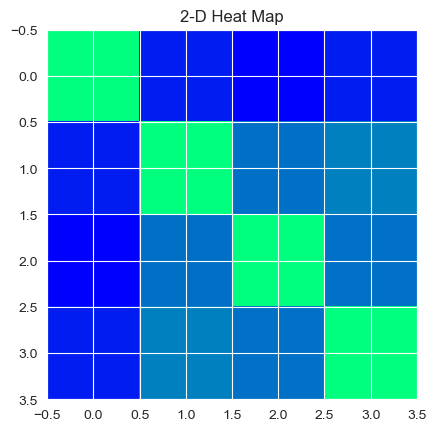

In [25]:
import numpy as np
import matplotlib.pyplot as plt
plt.imshow( data_w3_glb.corr() , cmap = 'winter' , interpolation = 'nearest' )
plt.title( "2-D Heat Map" )
plt.show()